# WHAT IS THE PROJECT ?



1.  CLV determines the long-term value each customer brings to the company
2. Customer Lifetime Value (CLV) represents the total revenue a customer is expected to generate for a business over their lifetime.

# BUSINESS APPLICATIONS ?

1. **Marketing Budget Allocation:** To decide how much marketing to be done and to which customers
2. **Personalized Offers:** Gives VIP clients targeted discounts or perks to keep them engaged.
3. **Profit Forecasting:** Provides an idea of where long-term revenue might come from within the customer base.
4. CLV is crucial for making informed decisions about:
  1. Customer acquisition – how much to invest in gaining new customers.
  2. Customer retention – strategies to keep existing customers engaged.
5. ***A higher CLV indicates long-term profitability and business sustainability.***

# DATASET

https://archive.ics.uci.edu/dataset/352/online+retail



Source:
1. https://www.upgrad.com/blog/linear-regression-project-ideas-topics-for-beginners/
2. https://www.kaggle.com/code/dktalaicha/predict-customer-life-time-value-clv
3. https://www.datacamp.com/tutorial/customer-life-time-value

# INSTALLING LIBRARIES

In [3]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Scikit-learn modules
from sklearn.impute import SimpleImputer,MissingIndicator,KNNImputer  # Corrected name
from sklearn.model_selection import train_test_split  # Correct
from sklearn.compose import ColumnTransformer  # Correct module
from sklearn.preprocessing import PowerTransformer,OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler  # Correct module & name
from sklearn.pipeline import Pipeline



# DATASET

In [4]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# UNDERSTANDING DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df.isna().mean()*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [9]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


<Axes: xlabel='count', ylabel='Country'>

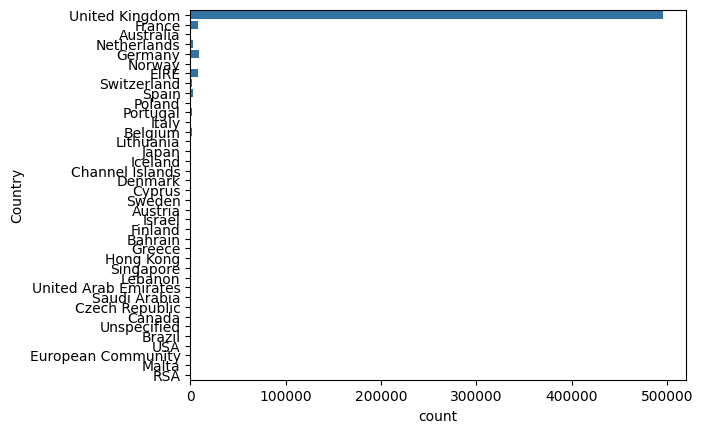

In [10]:
sns.countplot(df['Country'])

In [11]:
uk_df=df[df['Country']=='United Kingdom']
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [12]:
uk_df.drop(columns=['Country','Description'],inplace=True)

<ipython-input-12-4698dcef725a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df.drop(columns=['Country','Description'],inplace=True)


In [13]:
uk_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,495478.000000,495478,495478.000000,361878.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,227.588756,NaN,99.315438,1594.402590


In [14]:
uk_df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID'],
      dtype='object')

In [15]:
uk_df=uk_df[uk_df['Quantity']>0]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486286 entries, 0 to 541893
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Quantity     486286 non-null  int64         
 3   InvoiceDate  486286 non-null  datetime64[ns]
 4   UnitPrice    486286 non-null  float64       
 5   CustomerID   354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 26.0+ MB


In [16]:
uk_df.drop(columns=['StockCode'],inplace=True)

<ipython-input-16-b2cc1e61ae63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df.drop(columns=['StockCode'],inplace=True)


In [17]:
uk_df['totalPurchase']=uk_df['Quantity']*uk_df['UnitPrice']

<ipython-input-17-3b6c40ec7f59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['totalPurchase']=uk_df['Quantity']*uk_df['UnitPrice']


In [18]:
uk_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,totalPurchase
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
541889,581585,12,2011-12-09 12:31:00,1.95,15804.0,23.40
541890,581586,8,2011-12-09 12:49:00,2.95,13113.0,23.60
541891,581586,24,2011-12-09 12:49:00,1.25,13113.0,30.00
541892,581586,24,2011-12-09 12:49:00,8.95,13113.0,214.80


In [19]:
uk_df_group=uk_df.groupby('CustomerID').agg(
    {'InvoiceNo': lambda x: len(x),
    'Quantity': lambda x:x.sum(),
    'totalPurchase': lambda x:x.sum(),
    'InvoiceDate': lambda x: (x.max()-x.min()).days}
)

In [20]:
uk_df_group

,InvoiceNo,Quantity,totalPurchase,InvoiceDate
CustomerID,,,,
12346.0,1,74215,77183.60,0
12747.0,103,1275,4196.01,366
12748.0,4596,25748,33719.73,372
12749.0,199,1471,4090.88,209
12820.0,59,722,942.34,323
...,...,...,...,...
18280.0,10,45,180.60,0
18281.0,7,54,80.82,0
18282.0,12,103,178.05,118


In [21]:
uk_df_group.columns=['numTransactions','Quantity','totalPurchase','numDays']

In [22]:
uk_df_group['averageOrderValue']=uk_df_group['totalPurchase']/uk_df_group['numTransactions']

In [23]:
uk_df_group

,numTransactions,Quantity,totalPurchase,numDays,averageOrderValue
CustomerID,,,,,
12346.0,1,74215,77183.60,0,77183.600000
12747.0,103,1275,4196.01,366,40.737961
12748.0,4596,25748,33719.73,372,7.336756
12749.0,199,1471,4090.88,209,20.557186
12820.0,59,722,942.34,323,15.971864
...,...,...,...,...,...
18280.0,10,45,180.60,0,18.060000
18281.0,7,54,80.82,0,11.545714
18282.0,12,103,178.05,118,14.837500


In [24]:
purchase_frequency=sum(uk_df_group['numTransactions'])/uk_df_group.shape[0]

In [25]:
uk_df_group['profitMargin']=uk_df_group['totalPurchase']*0.05

In [26]:
repeatRate=uk_df_group[uk_df_group['numTransactions']>1].shape[0]/uk_df_group.shape[0]

In [27]:
churnRate=1-repeatRate

In [28]:
purchase_frequency,repeatRate,churnRate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [29]:
uk_df_group['CLV']=((uk_df_group['averageOrderValue']*purchase_frequency)/churnRate)*uk_df_group['profitMargin']

In [30]:
uk_df_group

,numTransactions,Quantity,totalPurchase,numDays,averageOrderValue,profitMargin,CLV
CustomerID,,,,,,,
12346.0,1,74215,77183.60,0,77183.600000,3859.1800,1.486579e+12
12747.0,103,1275,4196.01,366,40.737961,209.8005,4.265538e+07
12748.0,4596,25748,33719.73,372,7.336756,1685.9865,6.173424e+07
12749.0,199,1471,4090.88,209,20.557186,204.5440,2.098545e+07
12820.0,59,722,942.34,323,15.971864,47.1170,3.755789e+06
...,...,...,...,...,...,...,...
18280.0,10,45,180.60,0,18.060000,9.0300,8.139045e+05
18281.0,7,54,80.82,0,11.545714,4.0410,2.328507e+05
18282.0,12,103,178.05,118,14.837500,8.9025,6.592356e+05


In [31]:
uk_df['month_yr'] = uk_df['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

<ipython-input-31-80ec8c73724e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['month_yr'] = uk_df['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))


In [32]:
uk_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,totalPurchase,month_yr
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,Dec-2010
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,Dec-2010
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,Dec-2010
...,...,...,...,...,...,...,...
541889,581585,12,2011-12-09 12:31:00,1.95,15804.0,23.40,Dec-2011
541890,581586,8,2011-12-09 12:49:00,2.95,13113.0,23.60,Dec-2011
541891,581586,24,2011-12-09 12:49:00,1.25,13113.0,30.00,Dec-2011
541892,581586,24,2011-12-09 12:49:00,8.95,13113.0,214.80,Dec-2011


In [34]:
sale=uk_df.pivot_table(index=['CustomerID'],columns=['month_yr'],values='totalPurchase',aggfunc='sum',fill_value=0).reset_index()

In [35]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [45]:
sale.drop(columns='CustomerID',inplace=True)

KeyError: "['CustomerID'] not found in axis"

In [46]:
X_train, X_test, y_train, y_test = train_test_split(sale.drop(columns='CLV'), sale['CLV'], random_state=0)
# train_test_split returns 4 values: X_train, X_test, y_train, y_test
# We need to assign them to 4 separate variables to avoid the error
# xtrain and xtest were likely meant to be X_train and X_test

In [48]:
X_train

month_yr,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
2184,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,313.93,0.00,291.28,289.92
879,600.54,518.10,874.04,297.48,402.66,654.76,189.58,438.00,140.00,285.10,412.56,294.78,1032.82
2275,0.00,0.00,0.00,0.00,0.00,0.00,0.00,363.70,0.00,369.75,0.00,968.49,0.00
1652,0.00,1958.73,0.00,0.00,0.00,0.00,292.82,816.82,501.25,0.00,945.98,0.00,798.87
3448,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,285.56,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1007.90,0.00,301.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,733.94,0.00
3264,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,404.66,0.00,0.00
1653,0.00,1011.87,0.00,0.00,0.00,0.00,615.24,756.10,0.00,0.00,1417.15,616.31,329.02
2607,339.93,124.16,787.40,0.00,449.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,457.60


In [49]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [50]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


-2.9558577807620168e-12
[-1.57881212e-14  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00]


In [51]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))


R-Square: 1.0


In [52]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 6.6323199780809284e-12
MSE 5.1683445064805e-22
RMSE: 2.273399328424397e-11
